<a href="https://colab.research.google.com/github/Aarsh13/Random-Models/blob/main/Predict_Calorie_Expenditure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predict Calorie Expenditure


In [5]:
import pandas as pd
import numpy as np


In [12]:
df=pd.read_csv("./train.csv")
df=df.drop('id', axis='columns')
df.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

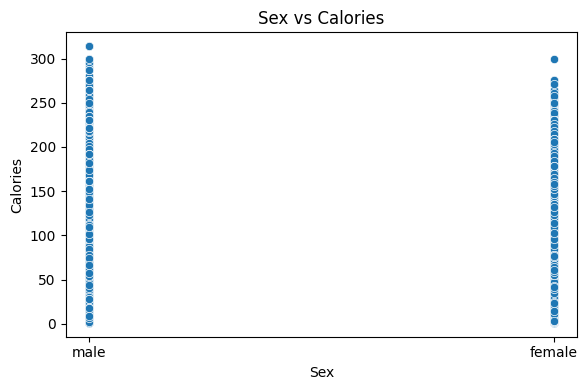

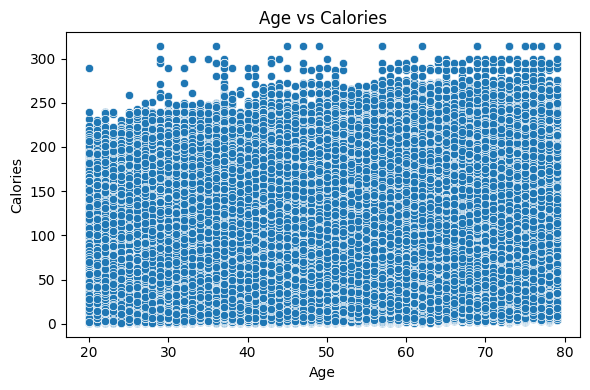

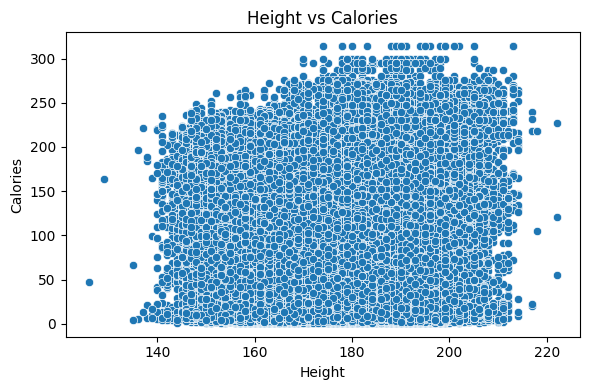

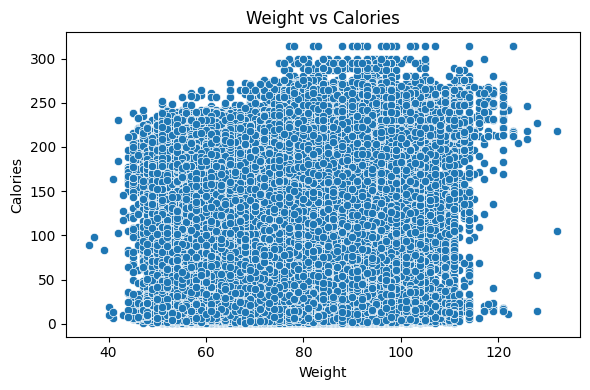

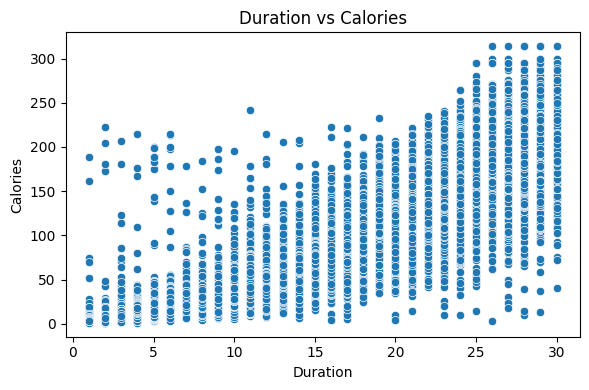

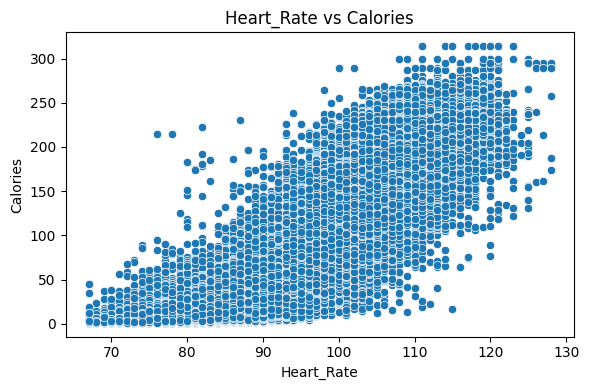

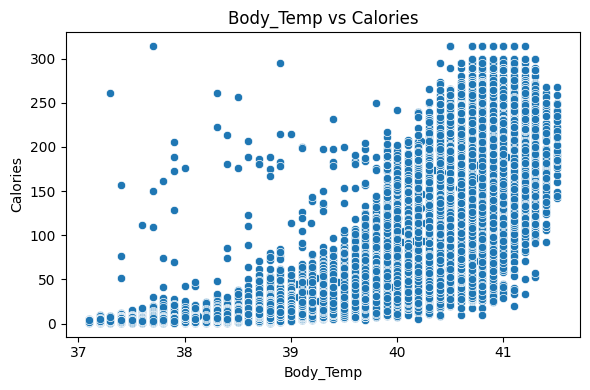

In [15]:
import seaborn as sns

output_col = 'Calories'

for column in df.columns:
    if column != output_col:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[column], y=df[output_col])
        plt.title(f'{column} vs {output_col}')
        plt.tight_layout()
        plt.show()

In [16]:
features=['Body_Temp', 'Heart_Rate', 'Duration']
df_features=df[features]
df_target=df['Calories']


In [17]:
df_features.size

2250000

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
model.score(X_test, y_test)

0.9501801473942783

In [30]:
X_test=pd.read_csv('./test.csv')
X_test.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5


In [32]:
X_test_noID=X_test.drop('id', axis='columns')

In [28]:
predictions=model.predict(X_test_noID[features])

In [33]:
output= pd.DataFrame({'id': X_test.id, 'Calories': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
